# Simple Linear Regression

# Problem Statement 2:

2) Salary_hike -> Build a prediction model for Salary_hike


In [40]:
# importing the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [41]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\SLR assignment

13-01-2023  03:41    <DIR>          .
13-01-2023  03:41    <DIR>          ..
13-01-2023  03:21    <DIR>          .ipynb_checkpoints
13-01-2023  03:17            62,028 Assignment no.4 - Delivery time.ipynb
13-01-2023  03:41            63,909 Assignment no.4- salary data.ipynb
04-12-2022  18:02               218 delivery_time.csv
04-12-2022  18:02               318 Problem_statements.txt
04-12-2022  18:01               454 Salary_Data.csv
               5 File(s)        126,927 bytes
               3 Dir(s)  125,535,707,136 bytes free


# EDA

In [42]:
# Reading the datafile
salary = pd.read_csv('Salary_Data.csv')
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [43]:
# Calculating description
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [44]:
# calculating shape of file
salary.shape

(30, 2)

In [45]:
# Checking information
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Correlation analysis

In [46]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization

Shape of dataframe (30, 2)
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


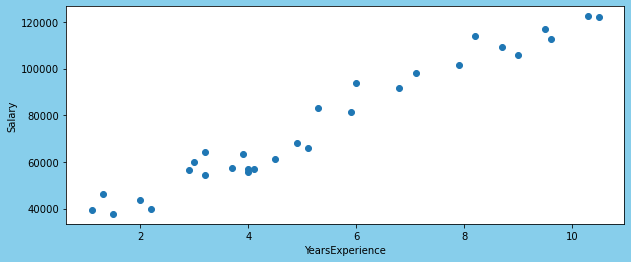

In [47]:
# Plotting the scatter plot
print('Shape of dataframe',salary.shape)
print('='*20)
print(salary.head(10))
plt.figure(figsize=(10,4),facecolor='skyblue')
plt.scatter(salary.YearsExperience,salary.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Model 1

In [49]:
# Building first_model and its summary
first_model = smf.ols('Salary~YearsExperience',data=salary).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        03:43:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Predicting first_model
first_model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

# Model 2

In [51]:
# Building model using log to features
second_model = smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()
second_model.rsquared

0.8538888828756969

In [52]:
# Predicting second_model
second_model.predict()

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

# Model 3

In [53]:
# Building third_model using log on target variable
third_model = smf.ols('np.log(Salary)~YearsExperience',data=salary).fit()
third_model.rsquared

0.9319671194084195

In [54]:
# Predicting third_model
third_model.predict()

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

# Model 4

In [55]:
# Building fourth_model using exponential on features
fourth_model = smf.ols('Salary~np.exp(YearsExperience)',data=salary).fit()
fourth_model.rsquared

0.47238440560728734

In [56]:
# Predict fourth_model
fourth_model.predict()

array([ 67575.04198885,  67576.46273475,  67578.19803771,  67584.40829102,
        67587.90276205,  67607.44567697,  67611.52848647,  67621.02744358,
        67621.02744358,  67655.02204349,  67674.15059409,  67685.24882096,
        67685.24882096,  67697.51425854,  67760.90519441,  67855.47335814,
        67918.98238267,  67996.55248041,  68348.35973276,  68430.36515372,
        69486.46301984,  70157.43555344,  73330.12888081,  75345.84176924,
        80391.08773442,  84877.13926773,  96105.54065754,  99106.79427956,
       131078.69880681, 145140.00432547])

# Model 5

In [57]:
# Building fifth_model using square on YearsExperience
salary['YearsExperience_Sq'] = salary.YearsExperience**2
fifth_model = smf.ols('np.log(Salary)~YearsExperience+YearsExperience_Sq',data=salary).fit()
fifth_model.rsquared

0.9486108638487355

In [58]:
# Predict the fifth_model
fifth_model.predict()

array([10.55146893, 10.58877076, 10.62554351, 10.71516063, 10.75008158,
       10.86813838, 10.88447456, 10.91675009, 10.91675009, 10.99512419,
       11.02554794, 11.0405614 , 11.0405614 , 11.0554426 , 11.11364467,
       11.16973041, 11.19697966, 11.22369982, 11.30068581, 11.31305386,
       11.40723651, 11.44037254, 11.52291536, 11.55168645, 11.59699285,
       11.62258944, 11.66260501, 11.67021131, 11.71975183, 11.73271583])

# First_model is good because it gives best R^2 value